In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#from mpl_toolkits.basemap import Basemap

In [3]:
rich = pd.read_csv("rich.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rich = rich.round(3)

In [5]:
rich = rich[rich["tip_rate"] > 1]

In [6]:
#rich = rich.sample(frac=0.1, random_state=1)

In [7]:
stations = set()

for idx, row in rich.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    if (-74.06 <= origin[0] <= -73.77) & \
    (-74.06 <= destination[0] <= -73.77) & \
    (40.61 <= origin[1] <= 40.91) & \
    (40.61 <= destination[1] <= 40.91):
        stations.add(origin)
        stations.add(destination)

In [8]:
diction = {}
c = 0
for i in stations:
    c += 1
    diction[i] = c

In [9]:
position = {}
c = 0
for i in stations:
    c += 1
    position[c] = i

In [10]:
G = nx.Graph()
#G = nx.DiGraph()

In [11]:
for k, v in diction.items():
    G.add_node(v, lat=k[0], long=k[1])

In [12]:
for idx, row in rich.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    if (-74.06 <= origin[0] <= -73.77) & \
    (-74.06 <= destination[0] <= -73.77) & \
    (40.61 <= origin[1] <= 40.91) & \
    (40.61 <= destination[1] <= 40.91):
        
        G.add_edge(diction[origin], diction[destination])

<IPython.core.display.Javascript object>


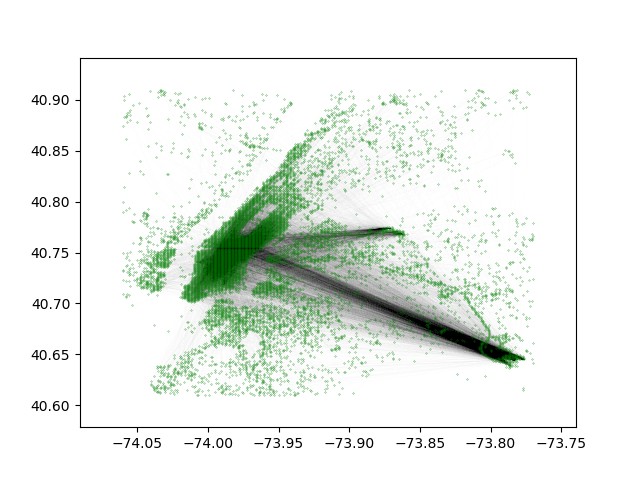

In [13]:
nx.draw_networkx(G, pos = position, node_color = 'green', edge_color = 'black', \
                 width = 0.002, node_size = 0.05, with_labels = False)